In [15]:
import pandas as pd
import os

# Define your path to where you saved the merged pickle
base_path = '/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.6/02 Data/Prepared Data'
save_path = os.path.join(base_path,'orders_products_merged_inner.pkl')

# Load the dataframe
ords_prods_merge = pd.read_pickle(save_path)

# Check shape and first few rows
print(ords_prods_merge.shape)
ords_prods_merge.head()

(32404859, 15)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0


In [18]:
# Define the function
def price_label(row):
   if row ['prices'] <= 5:
       return 'Low range product' 
   elif (row ['prices'] >5)and (row ['prices']<=15):
       return 'Midrange product'
   elif row ['prices'] >15:
       return ['High range product']
   else:return np.nan
       
print ( ords_prods_merge['prices'].value_counts())

prices
12.3    624261
10.3    510496
4.0     447272
6.3     438467
1.3     425691
         ...  
20.2       123
22.7        99
21.5        85
18.3        11
21.0         8
Name: count, Length: 242, dtype: int64


Orders per hour:
order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64


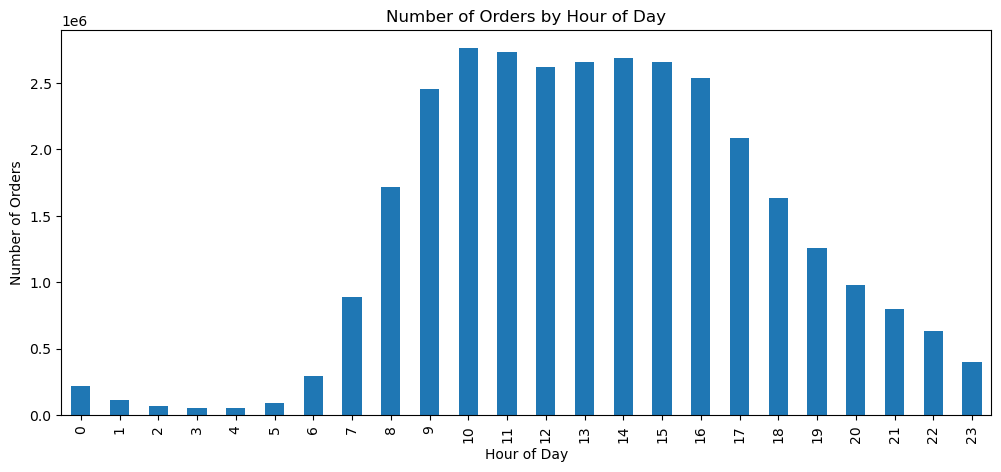

In [11]:
# Counting orders by hour of day
hour_counts = ords_prods_merge['order_hour_of_day'].value_counts().sort_index()
print("Orders per hour:")
print(hour_counts)

# visualize to help decide thresholds (optional)
import matplotlib.pyplot as plt

hour_counts.plot(kind='bar', figsize=(12,5))
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

In [17]:
# Define busiest periods based on order counts (adjust hours as per your data)
most_orders_hours = [10, 11, 14]  # example peak hours
fewest_orders_hours = [2, 3, 4, 5] # low activity hours
# The rest are average

def label_period(hour):
    if hour in most_orders_hours:
        return 'Most orders'
    elif hour in fewest_orders_hours:
        return 'Fewest orders'
    else:
        return 'Average orders'

ords_prods_merge['busiest_period_of_day'] = ords_prods_merge['order_hour_of_day'].apply(label_period)

# Check frequency counts
print(ords_prods_merge['busiest_period_of_day'].value_counts())

busiest_period_of_day
Average orders    23955964
Most orders        8187036
Fewest orders       261859
Name: count, dtype: int64


In [13]:
# Calculate order counts per day of week
dow_counts = ords_prods_merge['order_dow'].value_counts()

# Identify top 2 busiest days and bottom 2 slowest days
busiest_days = dow_counts.nlargest(2).index.tolist()
slowest_days = dow_counts.nsmallest(2).index.tolist()

# Create the new 'busiest_days' column with conditions
def label_busiest_slowest(day):
    if day in busiest_days:
        return 'Busiest days'
    elif day in slowest_days:
        return 'Slowest days'
    else:
        return 'Regular days'

ords_prods_merge['busiest_days'] = ords_prods_merge['order_dow'].apply(label_busiest_slowest)

# Step 4: Check value counts for this new column
print(ords_prods_merge['busiest_days'].value_counts())

busiest_days
Regular days    12916111
Busiest days    11864412
Slowest days     7624336
Name: count, dtype: int64


In [ ]:
#Outcome Explanation


In [19]:
# Define save path (adjust your path accordingly)
save_path = os.path.join(base_path, 'ords_prods_merge_updated.pkl')

# Save dataframe as pickle
ords_prods_merge.to_pickle(save_path)
print("Dataframe saved as pickle!")

Dataframe saved as pickle!
